# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф.
Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откроем и изучим файл

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('./datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Все данные числовые, без пропусков, таргетированный столбец присутствует ['is_ultra'], данные доп обработки не требуют

## Разобьем данные на выборки

In [5]:
target, features = df['is_ultra'], df.drop(['is_ultra'], axis=1) 

features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    train_size=0.7, 
    random_state=12345, 
    stratify=target
)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, 
    target_test, 
    train_size=0.5, 
    random_state=12345, 
    stratify=target_test
)

In [6]:
#check train

print(features_train.shape)
print(target_train.shape)

(2249, 4)
(2249,)


In [7]:
#check valid

print(features_valid.shape)
print(target_valid.shape)

(483, 4)
(483,)


In [8]:
#check test

print(features_test.shape)
print(target_test.shape)

(482, 4)
(482,)


## Исследуем модели

### Дерево решений

In [9]:
accuracy, max_depth  = [], []

In [10]:
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    
    max_depth.append(depth)
    accuracy.append(accuracy_score(target_valid, predictions_valid_tree))
    
    print("max_depth =", depth, ": ", accuracy[-1])

max_depth = 1 :  0.7474120082815735
max_depth = 2 :  0.7743271221532091
max_depth = 3 :  0.7950310559006211
max_depth = 4 :  0.7867494824016563
max_depth = 5 :  0.7929606625258799
max_depth = 6 :  0.7929606625258799
max_depth = 7 :  0.7991718426501035
max_depth = 8 :  0.7950310559006211
max_depth = 9 :  0.7971014492753623


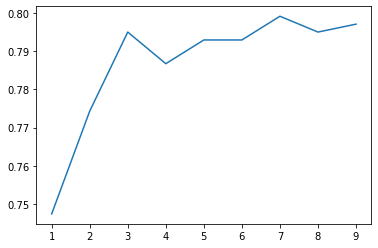

In [11]:
plt.plot(max_depth, accuracy);

Видно, что модель хорошо обучилась на глубине 3, затем точность упала и с глубины = 5 дерево начало переобучаться

Но в курсе было написано, что на глубине 3 модель еще недообучилась, а с 5 мы видим переобучение, так что дерево решений не лучшая модель

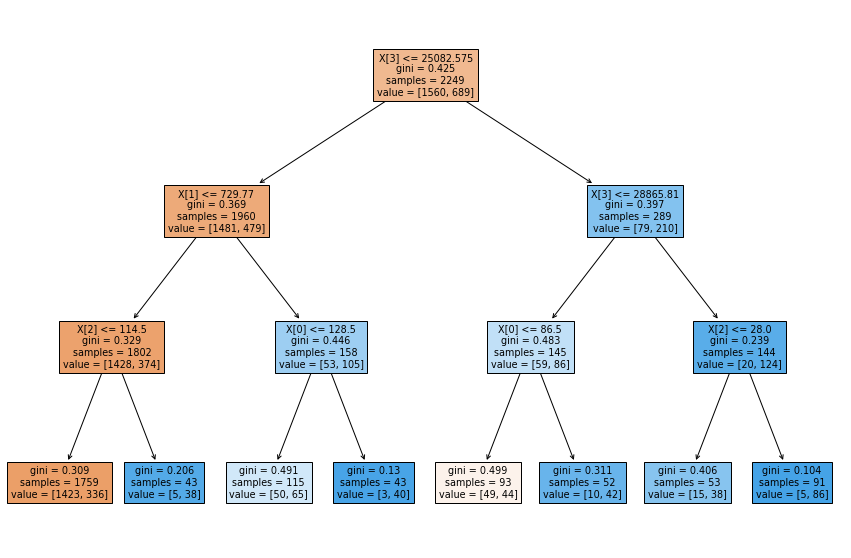

In [12]:
model_tree = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=3)
tree = model_tree.fit(features_train, target_train)
plt.figure(figsize=(15,10))
plot_tree(tree, filled=True);

Модель использует критерий критерий Джини, который показывает меру сходства двух наборов данных. Обучаясь, дерево в каждом узле задаёт наилучший вопрос. 
Сейчас оно выбирает тот вопрос, для которого критерий Джини показывает, что отнесённые к левой ветке данные меньше всего похожи на те, что в правой.

### Случайный лес

In [13]:
best_model_rf = None
best_result_rf = 0
for est in range(1, 11):
    model_rf = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model_rf.fit(features_train, target_train) 
    result_rf = model_rf.score(features_valid, target_valid) 
    if result_rf > best_result_rf:
        best_model_rf = model_rf 
        best_result_rf = result_rf 

print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)

Accuracy наилучшей модели на валидационной выборке: 0.782608695652174


### Логистическая регрессия

In [14]:
model_logreg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=10000) 
model_logreg.fit(features_train, target_train)
model_logreg.predict(features_valid) 
print(model_logreg.score(features_valid, target_valid))


0.7204968944099379


### Вывод по результатам исследования

- Во всех рассмотренных моделях доля правильных ответов accurasy больше 0.75. В Логстической регрессии достигнуть этого числа было тяжелее всего.

- В дереве решений оптимальная глубина оказалась 3

- В модели случайный лес перебрала количество деревьев от 1 до 10

- В логистической регрессии изменила алгоритм, который строит модель и добавила intercept_scaling, я пыталась понять что этот параметр делает, но так и не поняла:(

## Проверим модель на тестовой выборке

### Проверяем случайный лес

In [15]:
features_trainvalid = pd.concat([features_train, features_valid])
target_trainvalid = pd.concat([target_train, target_valid])

best_model_rf.fit(features_trainvalid, target_trainvalid)

result_rf_test = best_model_rf.score(features_test, target_test)
print("Accuracy наилучшей модели на тестовой выборке:", result_rf_test)

Accuracy наилучшей модели на тестовой выборке: 0.7987551867219918


## Проверим модели на адекватность

In [16]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_valid)
dummy_clf.score(features_valid, target_valid)

0.6935817805383023

Accuracy DummyClassifier меньше, чем у модели выше, значит модели адекватны. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
